### Práctica 2: Clasificación de imágenes

Como se ha realizado la práctica dentro de google colab, se hace un import a drive para poder conectar el google drive propio. Posteriormente, se monta el drive en la ruta ('/content/drive/'). De esta forma, se establece un acceso directo al entorno de drive, que es donde se van a tener todas las imagénes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Se hace una pequeña prueba de que el entorno de drive funciona correctamente. Para ello, se ejecuta primero un ls dentro de uno de los directorios. No devuelve error, así que funciona perfectamente. A continuación, y para enseñar la divisón de las carpetas, se installa el comando tree y se ejecuta. Este se encarga de mostrar la organización de las carpetas, divididads dentro de images en 3 apartados: test, train y val. Cada carpeta se divide en las cinco clases contenidas: Hello, I Love You, No, Thank You, Yes.

In [ ]:
# cambiar la ubicación de donde se encuentra en el dispositivo de cada uno
!ls /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/test/Yes/IMG_7282.JPG

!apt-get install tree -y

!tree /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/ -L 2
!tree /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/labels/ -L 2

/content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/test/Yes/IMG_7282.JPG
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (835 kB/s)
Selecting previously unselected package tree.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
/content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/
├── test
│   ├── Hello
│   ├── I Love You
│   ├── No
│   ├── Thank You
│ 

Se muestra una imagen por medio de imshow. Nuevamente, no es más que una prueba de que el entorno no está fallando y detecta las imágenes sin errores.

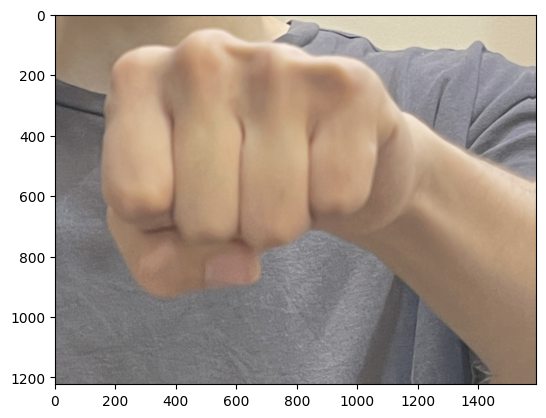

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

# cambiar ubicación a la de uno mismo
sign_im = Image.open('/content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/train/Yes/IMG_7453.jpg', 'r')

imshow(np.asarray(sign_im))

Dado que dentro del dataset no había muchas imágenes contenidas, es necesario preparar el entorno para data augmentation, como recomienda el propio dataset dentro de Kaggle.

Se instalan dos librerías:

- albumentation: Una librería recomendada para realizar data augmentation. Sirve para aumentar la calidad de las imágenes, así como la cantidad que se tiene de ellas.
- opencv-python: Una librería para poder procesar imágenes y vídeos, permitiendo trabajar cómodamente con estos.

In [ ]:
!pip install albumentations==1.3.1
!pip install opencv-python

import os
import cv2
import albumentations as A
import shutil


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 2.0.8
    Uninstalling albumentations-2.0.8:
      Successfully uninstalled albumentations-2.0.8


Lo primero que se hace es aclarar el directorio general en el que se encuentra el dataset dentro de google drive. Esto servirá para cuando se deba hacer un pequeño script para aumentar el número de imágenes que se tiene. Por un lado se tienen las imágenes y por otro las etiquetas de las mismas. La función os.path.join() une dos o más segmentos. En este caso, une la parte donde se encuentra el dataset con cada carpeta en específico, evitando repetir en cada uno de los apartados la misma dirección, al ser algo larga.

In [ ]:
# cambiar ubicación a la de uno mismo
DATASET_PATH = "/content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split"

# cambiar ubicación a la de uno mismo
train_images_path = os.path.join(DATASET_PATH, "images/train")
train_labels_path = os.path.join(DATASET_PATH, "labels/train")
val_images_path = os.path.join(DATASET_PATH, "images/val")
val_labels_path = os.path.join(DATASET_PATH, "labels/val")
val_images_path_1 = os.path.join(DATASET_PATH, "images/val/Hello")
val_images_path_2 = os.path.join(DATASET_PATH, "images/val/I Love You")
val_images_path_3 = os.path.join(DATASET_PATH, "images/val/No")
val_images_path_4 = os.path.join(DATASET_PATH, "images/val/Thank You")
val_images_path_5 = os.path.join(DATASET_PATH, "images/val/Yes")


print("Imágenes en:", train_images_path)
print("Labels en   :", train_labels_path)
print("Imágenes en:", val_images_path)
print("Labels en   :", val_labels_path)
print("Imágenes en:", val_images_path_1)
print("Imágenes en:", val_images_path_2)
print("Imágenes en:", val_images_path_3)
print("Imágenes en:", val_images_path_4)
print("Imágenes en:", val_images_path_5)


Imágenes en: /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/train
Labels en   : /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/labels/train
Imágenes en: /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/val
Labels en   : /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/labels/val
Imágenes en: /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/val/Hello
Imágenes en: /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/val/I Love You
Imágenes en: /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/val/No
Imágenes en: /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/val/Thank You
Imágenes en: /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_

Se define el augmentation usando la librería antes importada. Los filtros y cambios que se hacen son: rotación (en un rango aleatorio de 15 grados), modificiación de brillo y contraste (puede variar un 20 %), escala (puede variar un 10 %), desplazamientos (puede variar hasta un 5%) y desenfoque gaussiano (con un tamaño de entre 3 y 5 píxeles).

In [ ]:

transform = A.Compose([
    A.Rotate(limit=15, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.RandomScale(scale_limit=0.1, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=0, p=0.5),
    A.GaussianBlur(blur_limit=(3,5), p=0.3)
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))


Se detecta el número de la última imagen para evitar sobreescribir las que ya se tienen. Se guardará para la función de augmentation que se realizará posteriormente. Busca aquellas imágenes con el formato, por ejemplo, IMG_1234.JPG. La función os.walk() genera los archivos y nombres de directorios a revisar. Al pasarle 'train_images_path', se le para el objeto que debe revisar (es obligatorio el parámetro). Se revisa cada archivo y se guarda en una lista los números.

Cuando se tiene el número más alto del nombre de las imágenes, se le suma 1 para saber cual es el siguiente nombre que debe recibir una imagen.

In [ ]:
numbers = []

for root, dirs, files in os.walk(train_images_path):
    for f in files:
        if f.upper().endswith(".JPG") and f.upper().startswith("IMG_"):
            if f[4:8].isdigit():
                numbers.append(int(f[4:8]))

if numbers:
    last_image_name = max(numbers)
else:
    last_image_name = 0

next_image_number = last_image_name + 1

print("Número de imagen inicial para las aumentadas:", next_image_number)

Número de imagen inicial para las aumentadas: 7669


Lo que se desea es crear 3 imágenes por cada una de las originales que hay dentro de la carpeta train. Para ello, se recorren las imágenes, se guarda la ruta de cada unas de las versiones originales.

Se realiza lo mismo con las etiquetas YOLO, ya que el dataset venía con ellas, son archivos .txt. Si existe un label con el mismo número que la imagen, se lee todo su contenido. Se guarda cada uno de los datos que la etiqueta (clase, x, y, w, h). Se capta el bounding box, que es la caja que coge la figura o pose a examinar.

Se guarda la región rectangular donde está la mano a examinar. Si existe esta región, si la mano la tiene, se realiza el augmentation. Se transforman los datos generales para la nueva imagen creada. Si la imagen no tiene bounding box, se considera que es que no tiene nada presente a examinar. Se transforma la imagen real, pero la caja se deja vacía porque rellenarla con datos incorrectos puede dar errores.

Se define el nuevo nombre de la imagen y de su etiqueta, aumentando en 1 el valor del número para que la siguiente imagen no pise el valor de la anterior a ella.

In [ ]:
# AUGMENTATION
'''
NUM_AUG = 3

for img_file in train_images:
    img_path = os.path.join(train_images_path, img_file)
    image = cv2.imread(img_path)

    label_file = os.path.join(train_labels_path, img_file[:-4] + ".txt")
    bboxes = []
    class_labels = []

    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                class_labels.append(int(parts[0]))
                bbox = [float(x) for x in parts[1:5]]
                bboxes.append(bbox)

    for i in range(NUM_AUG):
        if len(bboxes) > 0:
            transformed = transform(image=image, bboxes=bboxes, class_labels=class_labels)
            aug_image = transformed['image']
            aug_bboxes = transformed['bboxes']
            aug_labels = transformed['class_labels']
        else:
            transformed = transform(image=image, bboxes=[], class_labels=[])
            aug_image = transformed['image']
            aug_bboxes = []
            aug_labels = []

        new_img_name = f"IMG_{next_image_number:04d}.jpg"
        cv2.imwrite(os.path.join(train_images_path, new_img_name), aug_image)

        new_label_name = f"IMG_{next_image_number:04d}.txt"
        with open(os.path.join(train_labels_path, new_label_name), 'w') as f:
            for cls, bbox in zip(aug_labels, aug_bboxes):
                bbox_str = " ".join([str(x) for x in bbox])
                f.write(f"{cls} {bbox_str}\n")

        next_image_number += 1

print("Data augmentation completado para train/ con 3 nuevas imágenes por cada original.")
'''


'\nNUM_AUG = 3\n\nfor img_file in train_images:\n    img_path = os.path.join(train_images_path, img_file)\n    image = cv2.imread(img_path)\n\n    label_file = os.path.join(train_labels_path, img_file[:-4] + ".txt")\n    bboxes = []\n    class_labels = []\n\n    if os.path.exists(label_file):\n        with open(label_file, \'r\') as f:\n            lines = f.readlines()\n            for line in lines:\n                parts = line.strip().split()\n                class_labels.append(int(parts[0]))\n                bbox = [float(x) for x in parts[1:5]]\n                bboxes.append(bbox)\n\n    for i in range(NUM_AUG):\n        if len(bboxes) > 0:\n            transformed = transform(image=image, bboxes=bboxes, class_labels=class_labels)\n            aug_image = transformed[\'image\']\n            aug_bboxes = transformed[\'bboxes\']\n            aug_labels = transformed[\'class_labels\']\n        else:\n            transformed = transform(image=image, bboxes=[], class_labels=[])\n    

Para aumentar las imágenes dentro de la validación, se hace lo mismo. Sin embargo, se sigue el último número guardado en las etiquetas de validación.

In [ ]:
numbers = []

for root, dirs, files in os.walk(val_labels_path):
    for f in files:
        if f.upper().endswith(".TXT") and f.upper().startswith("IMG_"):
            if f[4:8].isdigit():
                numbers.append(int(f[4:8]))

if numbers:
    last_label_name = max(numbers)
else:
    last_label_name = 0

next_label_number = last_label_name + 1

print("Número inicial para las etiquetas aumentadas:", next_label_number)

Número inicial para las etiquetas aumentadas: 7461


Se realiza el mismo proceso que al aumentar la cantidad de imágenes dentro del entrenamiento.

In [ ]:
'''
NUM_AUG = 2
val_images = [f for f in os.listdir(val_images_path_5) if f.lower().endswith(".jpg")]

for img_file in val_images:
    img_path = os.path.join(val_images_path_5, img_file)
    image = cv2.imread(img_path)
    h, w = image.shape[:2]

    label_file = os.path.join(val_labels_path, img_file[:-4] + ".txt")
    bboxes = []
    class_labels = []

    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                class_labels.append(int(parts[0]))
                bbox = [float(x) for x in parts[1:5]]
                bboxes.append(bbox)

    for i in range(NUM_AUG):
        transformed = transform(image=image, bboxes=bboxes, class_labels=class_labels)
        aug_image = transformed['image']
        aug_bboxes = transformed['bboxes']
        aug_labels = transformed['class_labels']

        new_img_name = f"IMG_{next_label_number:04d}.jpg"
        save_path = os.path.join(val_images_path_5, new_img_name)
        cv2.imwrite(save_path, aug_image)

        new_label_name = f"IMG_{next_label_number:04d}.txt"
        with open(os.path.join(val_labels_path, new_label_name), 'w') as f:
            for cls, bbox in zip(aug_labels, aug_bboxes):
                bbox_str = " ".join([str(x) for x in bbox])
                f.write(f"{cls} {bbox_str}\n")

        next_label_number += 1

print("Data augmentation completado para val/ con nuevas imágenes.")
'''

Guardado: /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/val/Yes/IMG_7451.jpg
Guardado: /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/val/Yes/IMG_7452.jpg
Guardado: /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/val/Yes/IMG_7453.jpg
Guardado: /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/val/Yes/IMG_7454.jpg
Guardado: /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/val/Yes/IMG_7455.jpg
Guardado: /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/val/Yes/IMG_7456.jpg
Guardado: /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/val/Yes/IMG_7457.jpg
Guardado: /content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/val/Yes/IMG_7

Como durante la práctica se pide usar PyTorch, se debe importar torch. Se tienen las direcciones de cada carpeta. Para que, aún con cambios, no de error y las imágenes se vean correctamente, se redimensionan todas las imágenes. El batch será de 32 para definir, este indica cuantas imágenes procesará la GPU a la vez.

Se guardan los datasets de imágenes de cada apartado con el nuevo tamaño. ImageFolder coloca las imágenes automáticamente. DataLoader itera sobre un dataset. Lo que hace es indicar la cantidad de imágenes a procesar juntas. Luego, en el entrenamiento se indica que se mezclen las imágenes, ya que es donde hay más para hacerlo. Para intentar reducir el tiempo en GPU, se cargarán datos en paralelo y se optimiza la transferencia de datos para intentar acelerar el proceso. Por último, se imprimen los datos obtenidos durante el proceso.

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

train_data_dir = '/content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/train'
validation_data_dir = '/content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/val'
test_data_dir = '/content/drive/MyDrive/Universidad/Cuarto_año/FSI/Sign_Language_Detection/dataset_split/images/test'

image_size = (150, 150)
batch_size = 32

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor()])

train_ds = datasets.ImageFolder(train_data_dir, transform=transform)

val_ds = datasets.ImageFolder(validation_data_dir, transform=transform)

test_ds = datasets.ImageFolder(test_data_dir, transform=transform)

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

print("Número de clases", len(train_ds.classes))
print("Clases: ", train_ds.classes)
print("Imágenes en train: ", len(train_ds))
print("Imágenes en val: ", len(val_ds))
print("Imágenes en test: ", len(test_ds))

Número de clases 5
Clases:  ['Hello', 'I Love You', 'No', 'Thank You', 'Yes']
Imágenes en train:  348
Imágenes en val:  109
Imágenes en test:  13


Se importa torch.nn.functional para posteriormente usar activaciones, one-hot encoding, etc sin necesidad de crear módulos. La primera función que se elabora es evaluate, que recibe el modelo y un conjunto de datos para probarlo. Su propósito es calcular el accuracy final para decretar que tan bien (o mal) ha ido el modelo.

Lo primero es definir lo que se usará, si CPU o CUDA (GPU). En el caso actual, se ha puesto que Gooogle Colab use una GPU para poder realizar el ejercicio sin tener que esperar largos ratos. Lo primero que se hace es poner el modelo listo para ser evaluado, para poder indicar su 'calificación final'. Para reducir el consumo de memoria, se desactiva el almacenamiento de momento de gradientes. Se cogen los datos y se pasan al dispositivo que se esté usando. Se obtienen las predicciones a partir de las salidas y se realiza la parte de comparar con los datos reales. Si las etiquetas coinciden, es un acierto. A ese total se le calcula el porcentaje y se tiene el accuracy.

La segunda función del bloque se encarga de vigilar el entrenamiento con validación por épocas. A medida que las épocas avanzan, va guardando los datos para poder hacer comparaciones entre, por ejemplo, la época 1 y 10. De esta forma, se percibe de verdad el proceso. Al igual que en evaluate(), lo primero es saber qué dispositivo se usará, si CPU o GPU.

Los datos por época que se irán almacenando sonla pérdida de entrenamiento, el accuracy del mismo, la pérdida por validación y su debido accuracy. Se inicia el entrenamiento en cada época. Se inician todos los valores para no tener interferencias con las épocas anteriores. Nuevamente se mueven los datos al dispositivo. Se cogen los datos de salida y se aplica a las labels one hot encoding, para obtener salidas más estables. Se calcula el gradiente y se va acumulando el valor de la pérdida que se ha ido obteniendo.

Se obtiene el valor de la predicción y cuantas imágenes se han acertado como en la evaluación y se da el resultado final. Luego se obtienen los valores en cada época, para poder devolverlos. Luego se repite el proceso, pero con los datos de validación y se guardan, para poder imprimirlos.

In [ ]:
import torch.nn.functional as F

def evaluate(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    correct = 0
    total = test_loader.dataset.__len__()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total if total > 0 else 0.0
    return accuracy


def train_with_validation(model, train_loader, dev_loader, criterion, optimizer, epochs=5):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.to(device)

    history = {
        'train_loss': [],
        'train_acc': [],
        'dev_loss': [],
        'dev_acc': [],
    }

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            n_classes = outputs.shape[1]
            labels_one_hot = F.one_hot(labels, num_classes=n_classes).float()

            loss = criterion(outputs, labels_one_hot)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        avg_train_loss = running_loss / max(1, len(train_loader))
        train_acc = 100.0 * correct / max(1, total)

        model.eval()
        dev_running_loss = 0.0
        with torch.no_grad():
            for inputs, labels in dev_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                n_classes = outputs.shape[1]
                labels_one_hot = F.one_hot(labels, num_classes=n_classes).float()
                dev_loss = criterion(outputs, labels_one_hot)
                dev_running_loss += dev_loss.item()
        avg_dev_loss = dev_running_loss / max(1, len(dev_loader))

        dev_acc = evaluate(model, dev_loader)

        history['train_loss'].append(avg_train_loss)
        history['train_acc'].append(train_acc)
        history['dev_loss'].append(avg_dev_loss)
        history['dev_acc'].append(dev_acc)

        print(f'[Epoch {epoch + 1}] '
              f'train_loss: {avg_train_loss:.3f} | train_acc: {train_acc:.2f}% | '
              f'dev_loss: {avg_dev_loss:.3f} | dev_acc: {dev_acc:.2f}%')

    return model, history

Una vez obtenidos los resultados, se deben de poder estos gráficamente para poder entenderlo mejor. Para ello, se realiza una nueva función. Se irá indicando en que época se encuentra y como han ido los resultados evolucionando (pérdida y accuracy). Entre los diferentes datos a indicar, se dan el tamaño, las curvas a dibujar, los nombres de los ejes, el título, etc.

Se procura que ambos gráficos tengan su propio espacio para mostrarse y se muestra la imagen final del resultado.

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
  epochs = range(1, len(history['train_loss'])+1)

  # Loss
  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  plt.plot(epochs, history['train_loss'], label='Train Loss')
  plt.plot(epochs, history['dev_loss'], label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()
  plt.grid(True)

  # Accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, history['train_acc'], label='Train Accuracy')
  plt.plot(epochs, history['dev_acc'], label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()


Se definen los hiperparametros con los que se empezará trabajando. En un inicio, se usarán 5 épocas y una taza de aprendizaje de 0.001 al ser este un buen punto de partida. Valores muy altos pueden afectar al entrenamiento y muy pequeños pueden ralentizarlo.

In [ ]:
# Hiperparametros

EPOCHS = 5
LR = 1e-3

Se importan todas las librerías que se van a necesitar para la realización de la práctica, tantos las habituales, como matplotlib o numpy, o algunas más especializadas, como sklearn.metrics para la matriz de confusión que hará falta al final del ejercicio.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import seaborn as sns

Para poder reproducir los datos, se fijan los datos. De esa forma, el usuario se asegura que el resultado no cambie aunque se ejecute dos o tres veces.

In [ ]:
def seed_everything(seed):
    import random
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
    np.random.seed(seed)
    random.seed(seed)
seed_everything(42)

### Experimento 1: MLP


El Perceptrón Multicapa (MLP) es una red neuronal artificial que se utiliza para el aprendizaje supervisado de manera automática. Una vez se tiene el dispositivo que se usará, se inicializan los datos y se empiezan a definir las capas a usar. Serán 3. Las imágenes tendrán todas el mismo tamaño (150x150), el 3 es porque se está usando RGB, donde se presentan 3 canales de color. a nn.Linear se le pasan los datos del tamaño de cada ejemplo y de cada resultado. La siguiente capa toma el output anterior y lo reduce, al igual que en la última capa, pero se reduce al número de clases que se tiene (5).

Se aplica ReLu (Rectified Linear Unit), esto para permitir al modelo aprender las formas sutiles e irregulares. Con los datos establecidos de entrada, se encarga la generación de la salida. Se accede a la imagen y se aplana, el -1 en view() indica que se quiere inferir en el tamaño de la imagen, parecido al mismo caso en numpy.reshape(). Posteriormente se calcula la transformación linear y se aplica la no linealidad. La última capa, fc3, no pasará por ese último paso. Solo hará la transformación y devolverá el valor de x.

Se mueve el modelo al dispositivo que se esté usando. Se definen el criterio y el optimizador. Se usará CrossEntropyLoss, que mide cuantas pérdidas se producen, cuantas equivocaciones. Compara las pérdidas con los datos de entrada correctos. Usando Adam como optimizador, se pretende que intente se reduca el error y que los modelos aprendan de manera eficiente y ajustada.

In [ ]:

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class SimpleMLP(nn.Module):
  def __init__(self, num_classes=5):
    super(SimpleMLP, self).__init__()
    self.fc1 = nn.Linear(3*150*150, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, num_classes)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = x.view(-1, 3*150*150)
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x

model_mlp = SimpleMLP().to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mlp.parameters(), lr=LR)


Para inicializar las pruebas, se usan 5 épocas, esperando ver que resultados se obtienen. Se usará el test como validación, para ir viendo el proceso con aquellos datos que aún no han sido usados. Para entrenar el modelo, se le pasarán datos de entrenamiento y validación, CrossEntropyLoss y el optimizador, junto con la cantidad de épocas. El resultado será ir imprimiendo los valores de pérdida y accuracy en cada momento.

In [ ]:

EPOCHS = 5
dev_loader = test_loader

model, history = train_with_validation(
    model=model_mlp,
    train_loader=train_loader,
    dev_loader=dev_loader,
    criterion=criterion,
    optimizer=optimizer,
    epochs=EPOCHS
)

[Epoch 1] train_loss: 11.512 | train_acc: 18.39% | dev_loss: 4.572 | dev_acc: 15.38%
[Epoch 2] train_loss: 3.465 | train_acc: 30.17% | dev_loss: 1.395 | dev_acc: 46.15%
[Epoch 3] train_loss: 1.454 | train_acc: 53.45% | dev_loss: 1.972 | dev_acc: 7.69%
[Epoch 4] train_loss: 1.063 | train_acc: 57.76% | dev_loss: 1.106 | dev_acc: 61.54%
[Epoch 5] train_loss: 0.810 | train_acc: 69.83% | dev_loss: 1.584 | dev_acc: 30.77%


Los resultados que se dan van por épocas. En resumen, el modelo está aprendiendo lentamente, reconociendo cada vez mejor las imágenes. Sin embargo, se nota cierta inestabilidad dentro de la validación. La pérdida baja, pero acaba aumentando al final, mientras que el accuracy va cambiando. No va subiendo, sino que llega a subir y bajas varias veces. Esto puede deberse a que se tratan con pocas imágenes o incluso overfitting, que es cuando el modelo ya se aprende 'de memoria' los resultados (hecho que se querrá evitar en los experimentos siguientes).

Se muestran los datos. La pérdida en el entrenamiento pasa de casi 12 a 2 y luego sigue bajando, lo que significa que el modelo aprende a ajustar poco a poco los datos. En el accuracy, se ve como tiene una mejora progresiva. Sin embargo, la validación en ambos casos es inestable. Para la pérdida es mucho más baja desde el inicio que el entrenamiento y con el accuracy tiene picos en los que suben y bajan los valores de manera notoria.

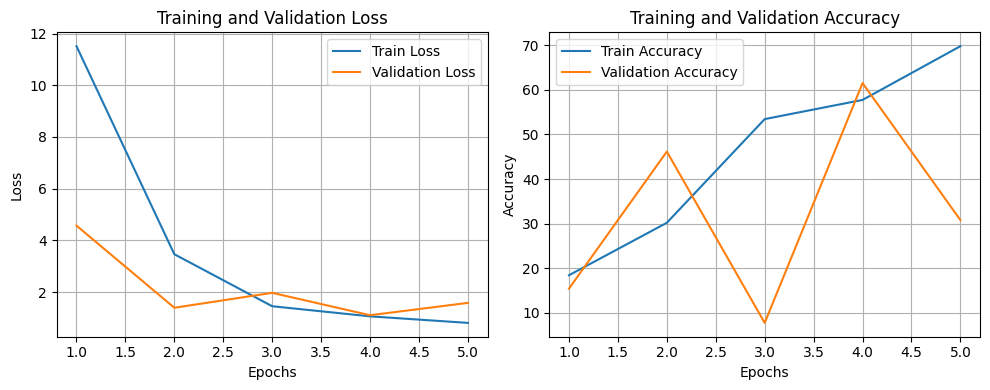

In [ ]:
plot_training_history(history)

In [ ]:
print("\nEvaluación final en test:")
acc = evaluate(model_mlp, test_loader)
print(f'Accuracy final en test: {acc:.2f}%')


Evaluación final en test:
Accuracy final en test: 30.77%


El resultado final es bajo, muestra que el modelo, sí, ha ido aprendiendo, pero no ha sido suficiente para hacerlo correctamente.

### Experimento 2: CNN

Para el segundo ejemplo, se usará una red neuronal CNN. Se trata de una artificial que sirve para trabajar con imágenes de forma más cómoda. Es un modelo de red convolutiva. Para ello, se definen capas convolutivas. Se producirán 16 filtros, con 3 canales y un tamaño de 3x3 del kernel. Luego, se añade un borde de un píxel. Se usa ReLu para que se aprendan relaciones no lineales. Se reduce el tamaño del kernel a 2. En al segundo capa se aumentan los filtros de 16 a 32.

Redimensiona la salida a una sola fila. Se aplican capas lineales. La primera tendrá 128 neuronas. La segunda capa convierte esos valores a una predicción por clase. Durante el entrenamiento se apaga de manera aleatoria el 30 % de las neuronas para tratar de reducir el overfitting.

Se aplana el vector, se calcula la transformación en cada capa y se devuelve el resultado final para el criterior y el optimizador.

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(SimpleCNN, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.flatten = nn.Flatten()

        self.fc1 = nn.LazyLinear(128)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.conv(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


Se repite prácticamente igual el mismo pasado que con el modelo MLP.

In [ ]:
model_cnn = SimpleCNN().to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=LR)

In [ ]:
EPOCHS = 5
dev_loader = test_loader

model_cnn, history = train_with_validation(
    model=model_cnn,
    train_loader=train_loader,
    dev_loader=dev_loader,
    criterion=criterion,
    optimizer=optimizer,
    epochs=EPOCHS
)

[Epoch 1] train_loss: 1.895 | train_acc: 18.97% | dev_loss: 1.590 | dev_acc: 38.46%
[Epoch 2] train_loss: 1.554 | train_acc: 35.63% | dev_loss: 1.520 | dev_acc: 53.85%
[Epoch 3] train_loss: 1.321 | train_acc: 56.61% | dev_loss: 1.273 | dev_acc: 53.85%
[Epoch 4] train_loss: 0.914 | train_acc: 69.54% | dev_loss: 1.073 | dev_acc: 61.54%
[Epoch 5] train_loss: 0.541 | train_acc: 83.05% | dev_loss: 1.136 | dev_acc: 61.54%


En este caso, se pueden apreciar mejores resultados. El entramiento sigue aprendiendo poco a poco y el entrenamiento accuracy va acertando más. La pérdida de la validación solo aumenta ligeramente al final. El accuracy de este no llega a disminuir como ocurría en MLP, donde se subía y bajaba. En pocas palabras, aunque el experimento no muestra los mejores resultados, sí que funciona mejor que el caso de MLP.

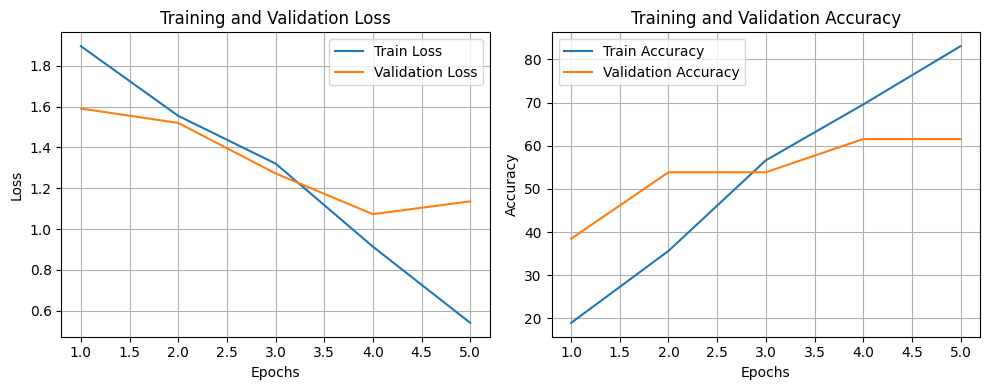

In [ ]:
plot_training_history(history)

Su accuracy final es mayor, de 61.54 % frente a 30.77 %.

In [ ]:
print("\nEvaluación final en test:")
acc = evaluate(model_cnn, test_loader)
print(f'Accuracy final en test: {acc:.2f}%')


Evaluación final en test:
Accuracy final en test: 61.54%


### Experimento 3: CNN con 20 epochs

Para seguir realizando pruebas, el siguiente modelo de CNN a usar no tendrá cambios en su funcionamiento interno, sino que se verá distribuido en más épocas. Con esto se intenta que la red neuronal se ajuste correctamente, que cada imagen se procese más veces. No obstante, se tiene en cuenta que esto puede promover la presencia de overfitting y que posteriormente se deberá de reducir.

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(SimpleCNN, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.flatten = nn.Flatten()

        self.fc1 = nn.LazyLinear(128)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.conv(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
model_cnn_2 = SimpleCNN().to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn_2.parameters(), lr=LR)

In [ ]:
EPOCHS = 20
dev_loader = test_loader

model_cnn, history = train_with_validation(
    model=model_cnn_2,
    train_loader=train_loader,
    dev_loader=dev_loader,
    criterion=criterion,
    optimizer=optimizer,
    epochs=EPOCHS
)

[Epoch 1] train_loss: 1.870 | train_acc: 19.83% | dev_loss: 1.663 | dev_acc: 15.38%
[Epoch 2] train_loss: 1.604 | train_acc: 26.44% | dev_loss: 1.593 | dev_acc: 30.77%
[Epoch 3] train_loss: 1.522 | train_acc: 42.24% | dev_loss: 1.521 | dev_acc: 23.08%
[Epoch 4] train_loss: 1.277 | train_acc: 51.72% | dev_loss: 0.998 | dev_acc: 61.54%
[Epoch 5] train_loss: 0.794 | train_acc: 73.85% | dev_loss: 0.930 | dev_acc: 61.54%
[Epoch 6] train_loss: 0.494 | train_acc: 83.33% | dev_loss: 0.961 | dev_acc: 69.23%
[Epoch 7] train_loss: 0.314 | train_acc: 89.94% | dev_loss: 0.683 | dev_acc: 76.92%
[Epoch 8] train_loss: 0.207 | train_acc: 93.97% | dev_loss: 0.838 | dev_acc: 76.92%
[Epoch 9] train_loss: 0.098 | train_acc: 97.99% | dev_loss: 1.155 | dev_acc: 76.92%
[Epoch 10] train_loss: 0.062 | train_acc: 98.56% | dev_loss: 0.969 | dev_acc: 76.92%
[Epoch 11] train_loss: 0.047 | train_acc: 99.14% | dev_loss: 0.878 | dev_acc: 84.62%
[Epoch 12] train_loss: 0.025 | train_acc: 100.00% | dev_loss: 1.030 | dev_

Como era de esperar, se produce cierto overfitting que se ve más claro en la gráfica debido al aumento de épocas. Desde pronto, el accuracy del entrenamiento ya es del 100 %. Por otro lado, en la validación aumenta el accuracy final. La red aprendió detalles mejores de los que fijarse, pero la pérdida aumentó hacia la mitad en la validación, lo cual no es algo bueno. En pocas palabras, la red está mejor, pero le faltan ciertos detalles para estar perfecta.

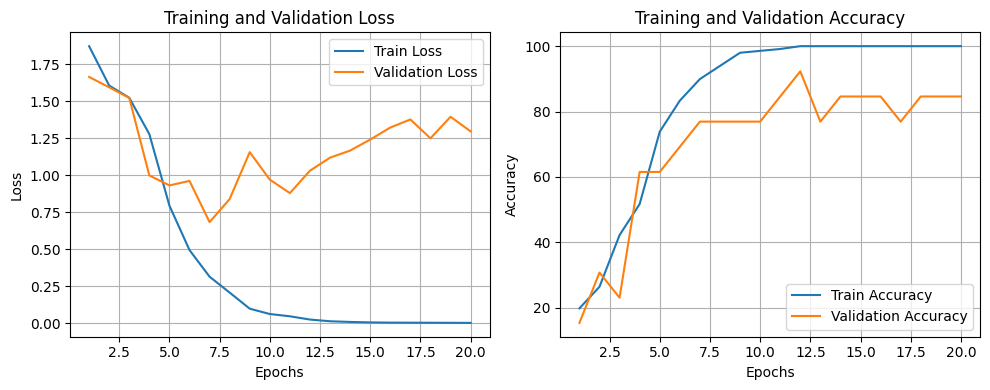

In [ ]:
plot_training_history(history)

In [ ]:
print("\nEvaluación final en test:")
acc = evaluate(model_cnn_2, test_loader)
print(f'Accuracy final en test: {acc:.2f}%')


Evaluación final en test:
Accuracy final en test: 84.62%


Experimento 4: CNN con modificaciones finales

En el siguiente experimento, se vuelve a usar CNN. A diferencia de los dos casos justo anteriores, se usarán más capas y se usa el BatchNorm2D para que la red sea más robusta ante malos inicios. Al añadir 2 capas nuevas, se pretende que se puedan extraer detalles más significativos, más completos.

Por otro lado, se aumenta el dropout a un 50% para depender menos de ciertas neuronas y reducir el overfitting que se estaba produciendo.

In [ ]:

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(SimpleCNN, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(16, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.flatten = nn.Flatten()

        self.fc1 = nn.LazyLinear(128)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.conv(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


Se le añade weight_decay entre los parámetros del optimizador para reducir el overfitting. Lo que hace la variable es penalizar los pesos grandes, evitando que la red depende de ellos.

In [ ]:
model_cnn_3 = SimpleCNN().to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn_3.parameters(), lr=LR, weight_decay=1e-3)

In [ ]:
EPOCHS = 20
dev_loader = test_loader

model_cnn, history = train_with_validation(
    model=model_cnn_3,
    train_loader=train_loader,
    dev_loader=dev_loader,
    criterion=criterion,
    optimizer=optimizer,
    epochs=EPOCHS
)

[Epoch 1] train_loss: 3.069 | train_acc: 30.17% | dev_loss: 2.189 | dev_acc: 7.69%
[Epoch 2] train_loss: 0.978 | train_acc: 66.09% | dev_loss: 1.964 | dev_acc: 30.77%
[Epoch 3] train_loss: 0.566 | train_acc: 78.16% | dev_loss: 1.466 | dev_acc: 53.85%
[Epoch 4] train_loss: 0.418 | train_acc: 85.06% | dev_loss: 0.916 | dev_acc: 84.62%
[Epoch 5] train_loss: 0.261 | train_acc: 90.80% | dev_loss: 0.535 | dev_acc: 84.62%
[Epoch 6] train_loss: 0.212 | train_acc: 92.82% | dev_loss: 0.451 | dev_acc: 76.92%
[Epoch 7] train_loss: 0.152 | train_acc: 96.26% | dev_loss: 0.627 | dev_acc: 84.62%
[Epoch 8] train_loss: 0.121 | train_acc: 95.69% | dev_loss: 0.654 | dev_acc: 76.92%
[Epoch 9] train_loss: 0.092 | train_acc: 97.13% | dev_loss: 0.386 | dev_acc: 84.62%
[Epoch 10] train_loss: 0.111 | train_acc: 97.13% | dev_loss: 0.524 | dev_acc: 84.62%
[Epoch 11] train_loss: 0.122 | train_acc: 95.98% | dev_loss: 0.710 | dev_acc: 92.31%
[Epoch 12] train_loss: 0.081 | train_acc: 98.28% | dev_loss: 0.452 | dev_ac

En el caso actual, el entrenamiento sigue yendo correctamente. El entrenamiento se queda entre 97-99%. La pérdida de la validación es más estable. Aumenta ligeramente en algunos momentos, pero apenas se nota. Por último, el accuracy de la validación es ligeramente mejor, llegando a 92% en algunas épocas. Esto demuestra que se logró reducir el overfitting que se estaba produciendo. Es cierto que en la gráfica hay algunos picos, pero los resultados tienen más sentido y son más normales.

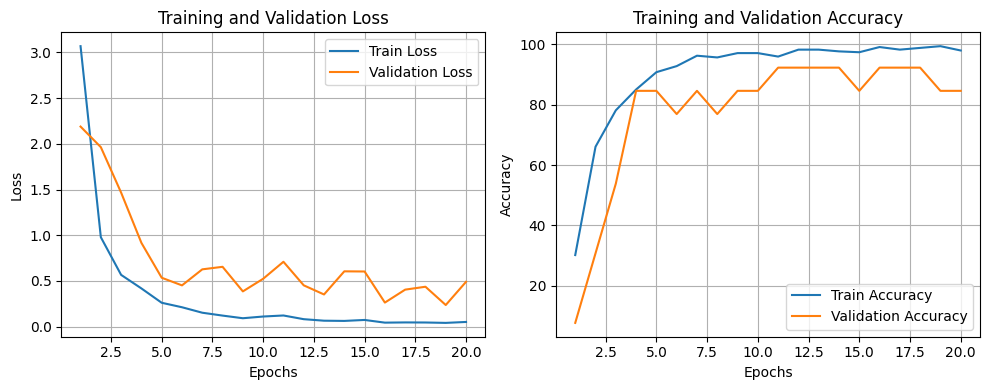

In [ ]:
plot_training_history(history)

In [ ]:
print("\nEvaluación final en test:")
acc = evaluate(model_cnn_3, test_loader)
print(f'Accuracy final en test: {acc:.2f}%')


Evaluación final en test:
Accuracy final en test: 84.62%


## Experimento 5: Transfer Learning

El quinto experimento se realizó haciendo uso de transfer learning. Esta técnica aprovecha un modelo ya entrenado para una nueva tarea. En el caso presentado, se usará resnet18, una red neuronal con 18 capas de profundidad, a la que se le indica que debe estar ya entrenada. Se pondrán los parámetros del modelo a false en requires_grad para que no se actualicen durante el entrenamiento. Esto es debido a que se quiere el conocimiento preentrenado para que sea más rápido.

Se tiene una capa solo, usando la que tiene ImageNet conectada a 1000 salidas debido a que ese es el número de clases que contiene. Luego se ajusta para predecir solo las 5 clases que se tienen guardadas.

In [ ]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_tl = models.resnet18(pretrained=True)

for param in model_tl.parameters():
    param.requires_grad = False

num_ftrs = model_tl.fc.in_features
model_tl.fc = nn.Linear(num_ftrs, 5)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model_tl = model_tl.to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer_tl = optim.Adam(model_tl.fc.parameters(), lr=1e-3)

In [ ]:
model_tl, history_tl = train_with_validation(
    model=model_tl,
    train_loader=train_loader,
    dev_loader=test_loader,
    criterion=criterion,
    optimizer=optimizer_tl,
    epochs=10
)

[Epoch 1] train_loss: 1.392 | train_acc: 45.11% | dev_loss: 1.175 | dev_acc: 69.23%
[Epoch 2] train_loss: 0.849 | train_acc: 80.46% | dev_loss: 0.658 | dev_acc: 76.92%
[Epoch 3] train_loss: 0.517 | train_acc: 94.25% | dev_loss: 0.298 | dev_acc: 100.00%
[Epoch 4] train_loss: 0.365 | train_acc: 97.13% | dev_loss: 0.165 | dev_acc: 100.00%
[Epoch 5] train_loss: 0.298 | train_acc: 96.55% | dev_loss: 0.125 | dev_acc: 100.00%
[Epoch 6] train_loss: 0.227 | train_acc: 98.28% | dev_loss: 0.101 | dev_acc: 100.00%
[Epoch 7] train_loss: 0.205 | train_acc: 99.14% | dev_loss: 0.079 | dev_acc: 100.00%
[Epoch 8] train_loss: 0.144 | train_acc: 100.00% | dev_loss: 0.077 | dev_acc: 100.00%
[Epoch 9] train_loss: 0.138 | train_acc: 99.43% | dev_loss: 0.058 | dev_acc: 100.00%
[Epoch 10] train_loss: 0.120 | train_acc: 100.00% | dev_loss: 0.052 | dev_acc: 100.00%


Los resultados se han sacado a partir de reducir las épocas, porque no eran necesarias 20 como en el caso anterior. Con el modelo de transfer learning, la pérdida en el entrenamiento es más rápida, casi llegando a 0. El accuracy sube de un 45 % a un 100% en pocas épocas y no tiene las subidas y bajadas del caso anterior.

Se reduce el overfitting y se llega al 100 % en el accuracy de la validación. A lo largo de los diferentes experimentos se ha ido notando una mejora gradual con los cambios realizados.

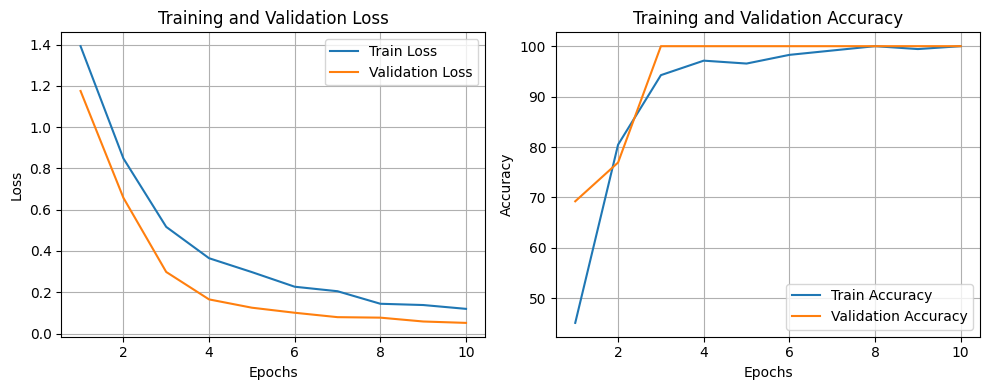

In [ ]:
plot_training_history(history_tl)

In [ ]:
print("\nEvaluación final en test:")
acc = evaluate(model_tl, test_loader)
print(f'Accuracy final en test: {acc:.2f}%')


Evaluación final en test:
Accuracy final en test: 100.00%


### Matriz de confusión

Para finalizar, se debe hacer la matriz de confusión de cada modelo. En la función, se define el dispositivo que se usará y se prepara el modelo para ser evaluado. Se tendrán dos arrays, uno con las etiquetas correctas y otras con las que ha predicho el modelo.

Se evitan calcular los gradientes para ahorrar memoria y se guardan los datos en ambos arrays. Con esos datos, se puede construir la matriz, usando sklearn para comparar los resultados. Cada columna tendrá las predicciones realizadas. Si por ejemplo, se tiene que la primera clase  clase es Hellow, el número en la esquina superior izquierda reflejará los aciertos (los datos se encuentran en la diagonal).

In [ ]:
def plot_confusion_matrix(model, loader, classes):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()

    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title('Matriz de Confusión')
    plt.show()

class_names = train_ds.classes


Vemos que hay alguna pequeña confusión con I love you y Hello

Experimento 1


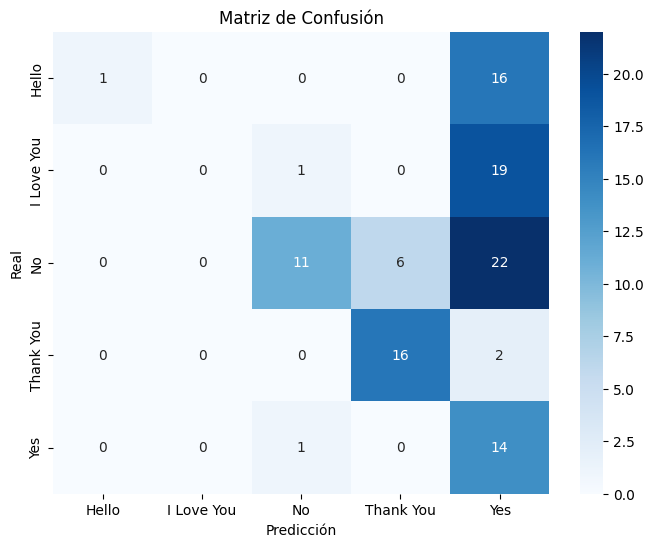

In [ ]:
# Matrices

# MLP
print("Experimento 1")
plot_confusion_matrix(model_mlp, val_loader, class_names)


En MLP se proudcen muchos errores, solo se deteca correctamente una imagen en la primer clase. La que mejor va en 'Thank You', con 16 detecciones correctas. No obstante, confunde mucho las clases con la de 'Yes'.

Experimento 2


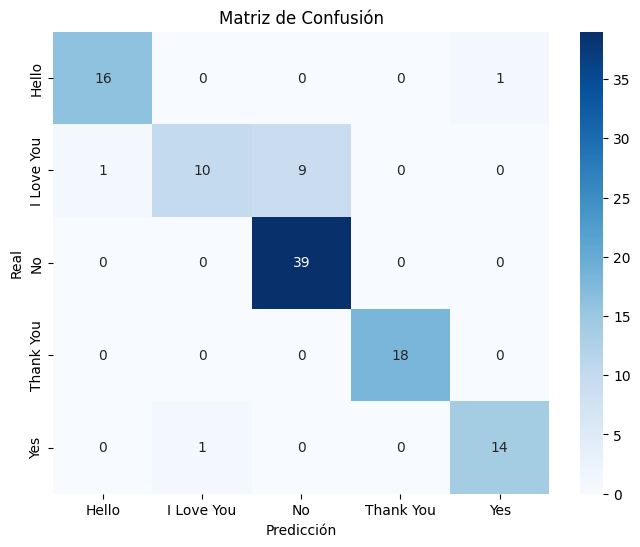

In [ ]:
# CNN
print("Experimento 2")
plot_confusion_matrix(model_cnn, val_loader, class_names)

Ya usando CNN los resultados en la matriz son mejores. Acierta mucho más, teniendo pequeñas confunsiones entre 'Yes' y 'I Love You', esta última con 'Hello' y esta con 'Yes'.

Experimento 3


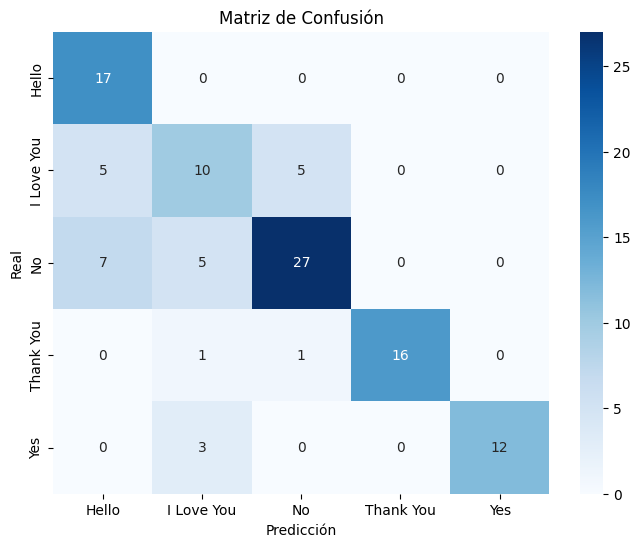

In [ ]:
# CNN 2
print("Experimento 3")
plot_confusion_matrix(model_cnn_2, val_loader, class_names)

Cuando se pasó a 20 épocas, se dieron muchos fallos, confundiendo varias clases con otras.

Experimento 4


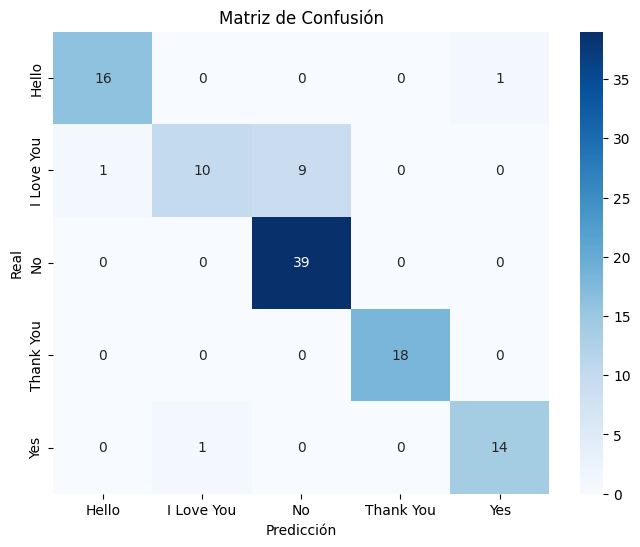

In [ ]:
# CNN 3
print("Experimento 4")
plot_confusion_matrix(model_cnn_3, val_loader, class_names)

Sin embargo, la confusión anterior se pudo corregir en el experimento final de CNN, reduciendo la cantidad de confusiones. Destaca simplemente 'I Love You' con 'No', que los confude en 9 imágenes (el modelo dicta que la imagen es una de la clase 'No', pero se equivoca).

Experimento 5


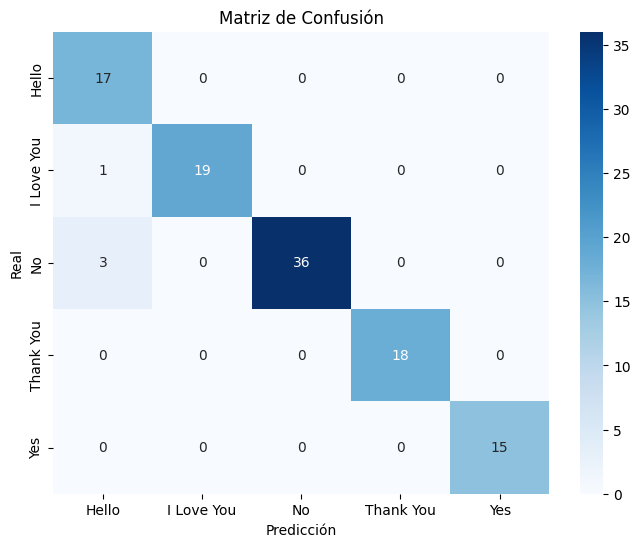

In [ ]:
# Transfer Learning
print("Experimento 5")
plot_confusion_matrix(model_tl, val_loader, class_names)

El caso de Transfer Learning, como cabe esperar, es el que menos errores presenta. Solo se equivoca con una imagen, pero que sean 4 de 109 es algo positivo. Demuestra como el modelo ya entrenado funciona mucho mejor que el que se ha ido entrenando en la práctica.